# Resampling

In [32]:
import os

import earthpy as et
from matplotlib.dates import DateFormatter
import pandas as pd


In [2]:
# Download data using earthpy
et.data.get_data('colorado-flood')

'/Users/elsa/earth-analytics/data/colorado-flood/.'

In [5]:
%%bash
find ~/earth-analytics/data/colorado-flood

/Users/elsa/earth-analytics/data/colorado-flood
/Users/elsa/earth-analytics/data/colorado-flood/precipitation
/Users/elsa/earth-analytics/data/colorado-flood/precipitation/PRECIP_HLY_documentation.pdf
/Users/elsa/earth-analytics/data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv
/Users/elsa/earth-analytics/data/colorado-flood/precipitation/805325-precip-dailysum-2003-2013.csv
/Users/elsa/earth-analytics/data/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv
/Users/elsa/earth-analytics/data/colorado-flood/precipitation/precip-boulder-aug-oct-2013.csv
/Users/elsa/earth-analytics/data/colorado-flood/discharge
/Users/elsa/earth-analytics/data/colorado-flood/discharge/README_dischargeMetadata.rtf
/Users/elsa/earth-analytics/data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv
/Users/elsa/earth-analytics/data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt
/Users/elsa/earth-analytics/data/colorado-flood/spatial
/Users/elsa/earth-a

In [7]:
# Change working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data', 'colorado-flood'))
os.getcwd()

'/Users/elsa/earth-analytics/data/colorado-flood'

In [42]:
%%timeit
# Set data paths
precip_pth = os.path.join('precipitation', '805333-precip-daily-1948-2013.csv')

os.path.exists(precip_pth)

True

In [12]:
# Load precipitation data into a DataFrame
precip_df = pd.read_csv(
    precip_pth,
    index_col='DATE',
    parse_dates=True,
    na_values=999.99
)
precip_df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.10,,


In [16]:
# Resample to daily sums
precip_daily_df = precip_df.resample('D').sum()

In [15]:
# An example of filling instead
precip_df.resample('H').ffill()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.0,g,
1948-08-01 02:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.0,g,
1948-08-01 03:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.0,g,
1948-08-01 04:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.0,g,
1948-08-01 05:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.0,g,
...,...,...,...,...,...,...,...,...
2013-12-30 20:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-30 21:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-30 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,


In [28]:
precip_daily_df[precip_daily_df.HPCP==precip_daily_df.HPCP.max()]

,HPCP
DATE,
2013-09-12,7.3


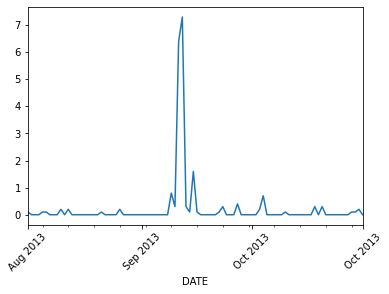

In [40]:
ax = precip_daily_df['2013-08':'2013-10'].HPCP.plot(rot=45)
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))